In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def horn_schunck(im1, im2, alpha=15, n_iter=100):
    im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0
    im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY).astype(np.float32) / 255.0

    Ix = cv2.Sobel(im1, cv2.CV_32F, 1, 0, ksize=3)
    Iy = cv2.Sobel(im1, cv2.CV_32F, 0, 1, ksize=3)
    It = im2 - im1

    u = np.zeros_like(im1)
    v = np.zeros_like(im1)

    kernel = np.array([[1/12, 1/6, 1/12],
                       [1/6 , 0  , 1/6 ],
                       [1/12, 1/6, 1/12]], dtype=np.float32)

    for _ in range(n_iter):
        u_avg = cv2.filter2D(u, -1, kernel)
        v_avg = cv2.filter2D(v, -1, kernel)
        num = (Ix * u_avg + Iy * v_avg + It)
        den = alpha**2 + Ix**2 + Iy**2
        u = u_avg - (Ix * num) / den
        v = v_avg - (Iy * num) / den

    return u, v

Horizontal velocity (u):
[[ 1.2912446e-04  1.2777749e-04  1.2295543e-04 ... -7.1026682e-04
  -6.7510753e-04 -6.6562614e-04]
 [ 1.3063820e-04  1.3319518e-04  1.2604397e-04 ... -7.0581556e-04
  -6.7784241e-04 -6.6787063e-04]
 [ 1.3458199e-04  1.3445807e-04  1.2854813e-04 ... -7.1084005e-04
  -6.8753050e-04 -6.7116664e-04]
 ...
 [ 1.4263527e-03  1.4598654e-03  1.5460802e-03 ...  5.2717995e-05
   5.0700692e-05  5.0021325e-05]
 [ 1.4615189e-03  1.4975666e-03  1.5903617e-03 ...  5.2661937e-05
   5.0875780e-05  4.9931077e-05]
 [ 1.4737714e-03  1.5109797e-03  1.6187894e-03 ...  5.2058334e-05
   5.1205749e-05  4.9992934e-05]]

Vertical velocity (v):
[[-7.8471756e-05 -7.7535238e-05 -7.4751006e-05 ... -4.4709872e-04
  -4.6740289e-04 -4.7430649e-04]
 [-8.0580299e-05 -8.0037920e-05 -7.6774333e-05 ... -4.5814516e-04
  -4.8068792e-04 -4.8629218e-04]
 [-8.8891924e-05 -8.6465494e-05 -8.3276835e-05 ... -5.0439883e-04
  -5.2750472e-04 -5.1067694e-04]
 ...
 [-6.9235457e-04 -6.9633638e-04 -7.0549583e-04 ..

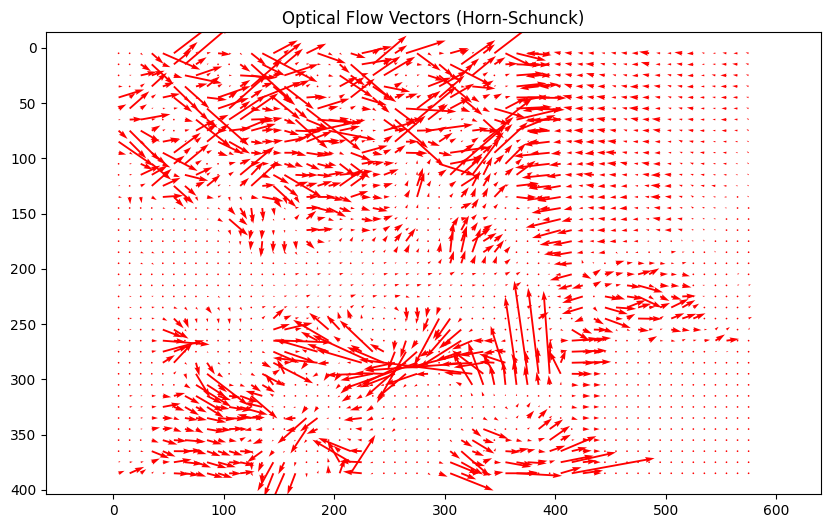

In [13]:
frame1 = cv2.imread("frame10.png")
frame2 = cv2.imread("frame11.png")

u, v = horn_schunck(frame1, frame2)
print("Horizontal velocity (u):")
print(u)

print("\nVertical velocity (v):")
print(v)


step = 10
h, w = u.shape
y, x = np.mgrid[step//2:h:step, step//2:w:step]

u_sliced = u[y, x]
v_sliced = v[y, x]

plt.figure(figsize=(10, 6))
plt.title("Optical Flow Vectors (Horn-Schunck)")
plt.quiver(x, y, u_sliced, v_sliced, color='red', angles='xy')
plt.gca().invert_yaxis()
plt.axis("equal")
plt.show()